In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('train.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## handling datatypes

In [7]:
#ashan atl3 kol el datatypes btaat kolo
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name               str
Sex                str
Age            float64
SibSp            int64
Parch            int64
Ticket             str
Fare           float64
Cabin              str
Embarked           str
dtype: object

In [8]:
dtypes = df.dtypes
df.nunique() #elarkam elsoghyra categorical wel kbera numerical

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
dtypes = df.dtypes
no_unique = df.nunique()
pd.DataFrame({'Dtypes': dtypes, 'no of unique' : no_unique}).T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Dtypes,int64,int64,int64,str,str,float64,int64,int64,str,float64,str,str
no of unique,891,2,3,891,2,88,7,7,681,248,147,3


In [10]:
#continuous > elkema ely ma2drsh agbha lel mosta2bal eh hya (salary for a sp job)
#categorical > keyam an aaarfa hya eh malhash haga talta
#hhawl eldata l categorical

In [11]:
#hhawl eldata l categorical

cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
df[cols] = df[cols].astype('category')

In [12]:
#arg3 lel chk function ely amlha
from pp import chk
chk(df)

ImportError: cannot import name 'chk' from 'pp' (d:\depi\GIZ4_AIS2_S1_ML\src\preprocessing and visualization\session_4\code\pp.py)

## handling nulls

In [13]:
#ytl3ly kol el nulls
null = df.isnull()
null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
#ytl3ly sum of nulls
null = df.isnull().sum()
null

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
#ashan law eldata btaaty bttghyr w ayza a -track it live
df.shape[0]

891

In [16]:
#to get ratio of nulls
null = df.isnull().sum()
ratio = null / df.shape[0]
ratio


PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [17]:
null = df.isnull().sum()
ratio = null / df.shape[0]
pd.DataFrame({'Null': null, 'Ratio' : ratio}).T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Null,0.0,0.0,0.0,0.0,0.0,177.000000,0.0,0.0,0.0,0.0,687.000000,2.000000
Ratio,0.0,0.0,0.0,0.0,0.0,0.198653,0.0,0.0,0.0,0.0,0.771044,0.002245


In [18]:
#ashan a3mlha function

def chk_nulls(df):
    null = df.isnull().sum()
    ratio = null / df.shape[0]
    return pd.DataFrame({'Null': null, 'Ratio' : ratio}).T

In [34]:
from null import chk_nulls()
chk_nulls(df)

SyntaxError: invalid syntax (2541669102.py, line 1)

In [19]:
#ashel rows el null ely fe embarked
df = df.dropna(subset=['Embarked'])

In [20]:
df = df.drop('Cabin', axis = 1)

In [21]:
#elba2y a fill bel median
median = df['Age'].median()

df['Age'].fillna(median, inplace = True)

C:\Users\Zone\AppData\Local\Temp\ipykernel_6288\1798205305.py:4: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['Age'].fillna(median, inplace = True)


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [22]:
df.describe()

,PassengerId,Age,Fare
count,889.000000,712.000000,889.000000
mean,446.000000,29.642093,32.096681
std,256.998173,14.492933,49.697504
min,1.000000,0.420000,0.000000
25%,224.000000,20.000000,7.895800
50%,446.000000,28.000000,14.454200
75%,668.000000,38.000000,31.000000
max,891.000000,80.000000,512.329200


In [ ]:
sorting > median > q2 > q1 > q3 > IQR
IQR = q3 - q1 ytl3 value > fence
btl3 upper fence w lower fence

##### sorting > median > q2 > q1 > q3 > IQR
##### IQR = q3 - q1 ytl3 value > fence
##### btl3 upper fence w lower fence

##### q2 hwa awl splitting then et2smt l q1 and q3 then we subtracted q3 men q1 ytl3ly 3amod el lower fence

##### lower = q1 - 1.5IQR
##### upper = q3 + 1.5IQR




In [37]:
pip install matplotlib

  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.3 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/8.1 MB 1.4 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/8.1 MB 1.4 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.1 MB 1.4 MB/s eta 0:00:05
   --------- ------------------------------ 1.8/8.1 MB 1.4 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.1 MB 1.5 MB/s eta 0:00:05
   ----------- ---------------------------- 2.4/8.1 MB 1.5 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/8.1 MB 1.6 MB/s eta 0:00:04
   ---------------- -------------------

In [2]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='str')

ValueError: num must be an integer with 1 <= num <= 2, not 3

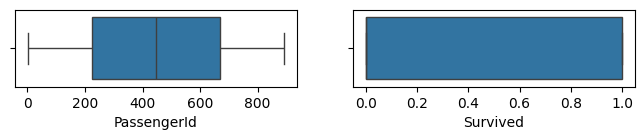

In [15]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i,col in enumerate(num_cols):
    plt.subplot(1,2, i+1)
    sns.boxplot(df[col], orient='h')

In [ ]:
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5*IQR
    upper_fence = Q3 + 1.5*IQR

    

    print(Q1)  
    print(Q3)
    print(IQR)


224.0
668.0
444.0
20.0
38.0
18.0
7.8958
31.0
23.1042


In [17]:
num_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='str')

###### session 5

ValueError: num must be an integer with 1 <= num <= 2, not 3

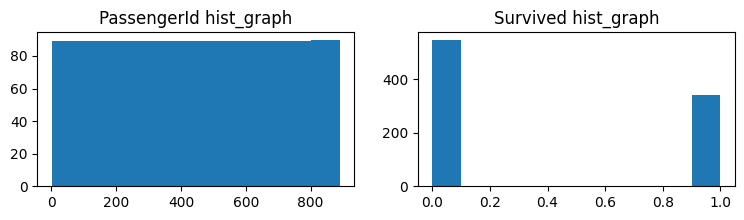

In [16]:
plt.figure(figsize=(9,2))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    plt.hist(df[col])
    plt.title(f"{col} hist_graph")

plt.show()